## 1. Setup Mario

#### Initializing

Libraries in use
1. openai-gym with the PyPI library: https://pypi.org/project/gym-super-mario-bros/
2. nes-py virtual 


In [17]:
# install gym_super_mario_bros and nes_py
# !pip3 install gym==0.23.1
# !pip3 install nes_py

In [18]:
# import the game
import gym_super_mario_bros

# import the joypad wrapper
from nes_py.wrappers import JoypadSpace
# import simplified controls
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT

# import ml_funcs
import ml_funcs




In [19]:
# The different actions which we can take
SIMPLE_MOVEMENT

[['NOOP'],
 ['right'],
 ['right', 'A'],
 ['right', 'B'],
 ['right', 'A', 'B'],
 ['A'],
 ['left']]

In [20]:
# Creating the environment / game
env = gym_super_mario_bros.make('SuperMarioBros-v0')
env = JoypadSpace(env, SIMPLE_MOVEMENT) # wrapping it to only use the simple movements

In [21]:
# 7 actions which it can do (SIMPLE_MOVEMENT)
env.action_space

Discrete(7)

In [22]:
# A frame from the game
env.observation_space.shape

(240, 256, 3)

In [23]:
# Random action
SIMPLE_MOVEMENT[env.action_space.sample()]
env.action_space.sample()

6

#### Action loop

In [24]:
# Cretaed a flag which is true
# done = True # Restart or not, Right now its not started
# # Loop through each of the frames in the game
# for step in range(100000):
#     if done:
#         # start the game
#         env.reset()
#     # take a step with a random action
#     state, reward, done, info  = env.step(env.action_space.sample())
#     env.render()
# env.close()


#### Testing and understanding data

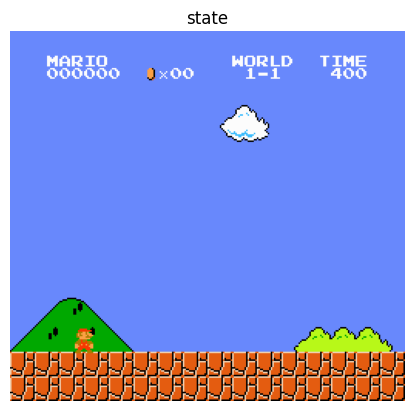

In [25]:
import ml_funcs
state = env.reset()
state.shape # here we get a state
# the state is the current data and situation which the charater is in the game
# for this proj it is the current screen

ml_funcs.view.image(state, 'state')


0.0


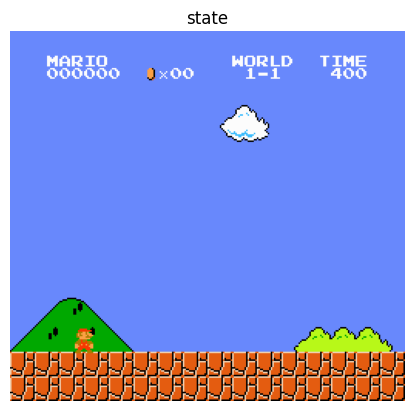

{'coins': 0, 'flag_get': False, 'life': 2, 'score': 0, 'stage': 1, 'status': 'small', 'time': 400, 'world': 1, 'x_pos': 40, 'x_pos_screen': 40, 'y_pos': 79}


In [26]:
# env.step() gives back the state, reward, done and info
state, reward, done, info  = env.step(1)
print(reward)
ml_funcs.view.image(state, 'state')
# the reward function in this case is built by calculating how far mario moves right and how fast he does so without dying
print(info)

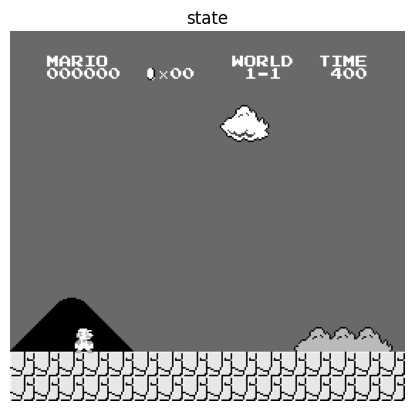

In [27]:
state.shape
state2 = state[:,:,0]
ml_funcs.view.image(state2, 'state')


## 2. Preprocess env

A great ai must have great data

Steps required
- Grayscale because it wont be necessary
- stack the frames to show trajectory

Stable_baslines3: https://stable-baselines3.readthedocs.io/en/master/

In [28]:
!pip3 install 'stable-baselines3[extra]'
# Also install torch

In [29]:
# Import Frame Stacker Wrapper and GrayScale Wrapper
from gym.wrappers import GrayScaleObservation

# Vectorize Wrapper - great wrappers
from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv

# Import Matplotlib to show the impact of frame stacking
from matplotlib import pyplot as plt

In [31]:
# 1. Creating the base environment 
env = gym_super_mario_bros.make('SuperMarioBros-v0')

# 2. Simplify the controls
env = JoypadSpace(env, SIMPLE_MOVEMENT) # wrapping it to only use the simple movements

# 3. Grayscale the environment 
# The grayscaleobservation basically grayscales the picture within the env
env = GrayScaleObservation(env, keep_dim=True) # keep_dim to be able to stack the frames later
# 4. Wrap it intside the dummy env
env = DummyVecEnv([lambda: env])
# 5. Stack the frames

state = env.reset()
ml_funcs.view.image(state, None)


AttributeError: 'SuperMarioBrosEnv' object has no attribute 'render_mode'

## 3 Train the RL Model

## 4. analyse the results